In [2]:
import numpy as np
import pandas as pd

In [4]:
from keras.datasets import fashion_mnist

In [5]:
(train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()

In [6]:
x_train = np.array(train_x,dtype='float32')
x_test = np.array(test_x,dtype='float32')

x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

In [7]:
y_train = train_y
y_test = test_y

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [10]:
model = Sequential()

model.add(Conv2D(filters=64,input_shape=(28,28,1),kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation= 'softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1500/1500 [==============================] - ETA: 0s - loss: 0.3948 - accuracy: 0.8585WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000026AB2070318> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and att

In [12]:
loss,acc = model.evaluate(x_test,y_test)
print(loss)
print(acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.2684 - accuracy: 0.9136
0.26839378476142883
0.9136000275611877


In [15]:
import matplotlib.pyplot as plt

In [26]:
def show_datapoint(id_,labels):
    label = train_y[id_]
    if label not in labels:
        print(label)
        plt.imshow(train_x[id_])
        plt.show()
    return label

9


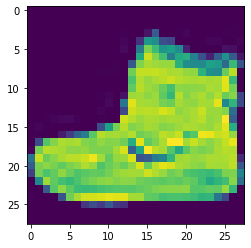

0


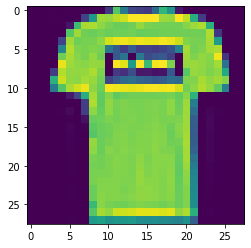

3


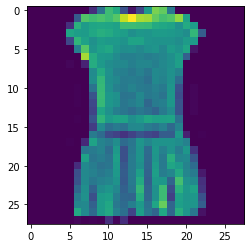

2


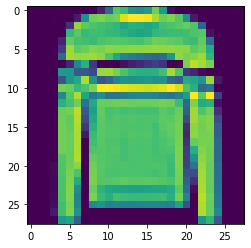

7


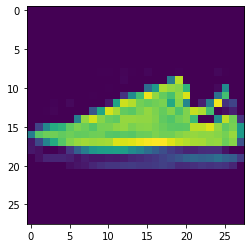

5


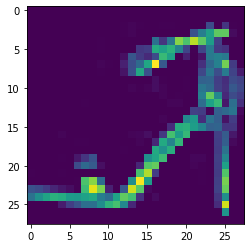

1


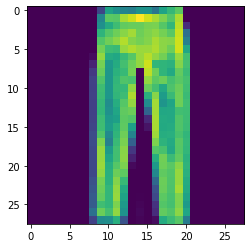

6


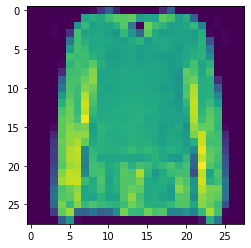

4


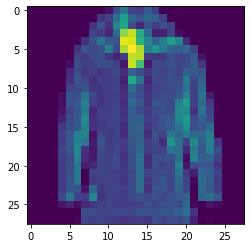

8


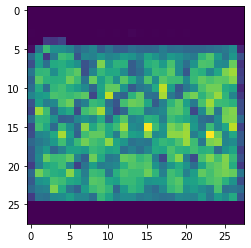

In [27]:
labels=[]
i=0
while len(labels)<10:
    label=show_datapoint(i,labels)
    if label not in labels:
        labels.append(label)
    i+=1

In [35]:
labels=['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneakers','bag','anket_boots']
def predict(id_):
    print(labels[np.argmax(model.predict(x_test[id_:id_+1]))])
    plt.imshow(x_test[id_])

shirt


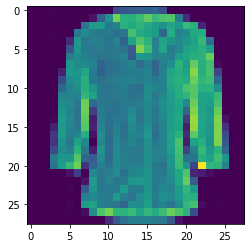

In [40]:
predict(4)